## Исследование сервиса аренды самокатов
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.\
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- **без подписки**
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
- **с подпиской Ultra**
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users_df = pd.read_csv('C:\\Users\\jmilo\\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Самокаты\\проект\\users_go.csv')
rides_df = pd.read_csv('C:\\Users\\jmilo\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Самокаты\\проект\\rides_go.csv', parse_dates=['date'])
subscriptions_df = pd.read_csv('C:\\Users\\jmilo\\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Самокаты\\проект\\subscriptions_go.csv')

In [3]:
users_df.info()
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
rides_df.info()
rides_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
subscriptions_df.info()
subscriptions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод**: ознакомились с данными. Данные о пользователях состоят из 1565 строк, пропусков нет. Данные о поездках содержат 18068 строк, пропусков нет, при чтении файла привели столбец date к формату даты, также в соответствии с заданием необходимо округлить по "потолку" значения в столбце duration. Данные о подписках состоят из 2 строк, пропусков и повторов нет.

#### Шаг 2. Предобработка данных

In [6]:
#Создадим новый столбец с номером месяца
rides_df['month'] = rides_df['date'].dt.month

In [7]:
# Проверим
rides_df.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
# Проверим пропущенные значения в users_df
users_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
# Проверим пропущенные значения в rides_df
rides_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенных значений нет

In [10]:
# Проверим дубликаты в данных пользователей
print(users_df.duplicated().sum())

31


In [11]:
duplicate_users = users_df[users_df.duplicated()]
duplicate_users

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [12]:
# Удалим дубликаты
users_df = users_df.drop_duplicates()

In [13]:
# Проверяем
print(users_df.duplicated().sum())

0


In [14]:
# Проверим дубликаты в данных о поездках
print(rides_df.duplicated().sum())

0


**Вывод:** создан столбец с номером месяца. Устранены дубликаты данных.

#### Шаг 3. Исследовательский анализ данных

**Частота встречаемости городов**

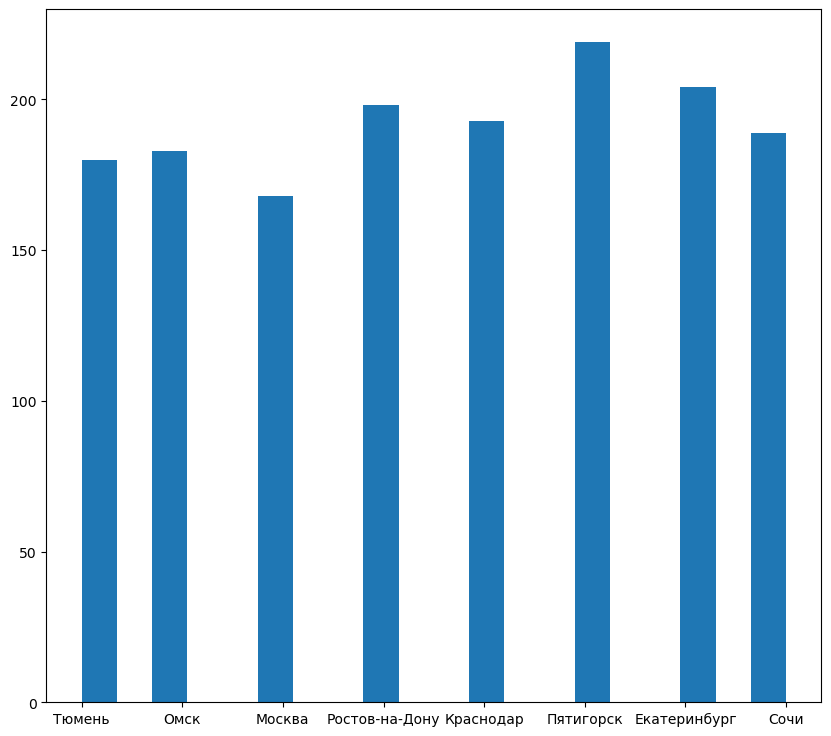

In [15]:
users_df['city'].hist(bins=20, grid=False, figsize=(10,9));

Больше всего пользователей в Пятигорске и Екатеринбурге. Меньше всего в Москве.

**Соотношение пользователей с подпиской и без подписки**

In [16]:
# Посчитаем количество пользователей в категориях
users_ultra_count = users_df.query('subscription_type == "ultra"')['user_id'].count()
users_free_count = users_df.query('subscription_type == "free"')['user_id'].count()
print(f'Количество пользователей без подписки: {users_free_count}')
print(f'Количество пользователей c подпиской: {users_ultra_count}')

Количество пользователей без подписки: 835
Количество пользователей c подпиской: 699


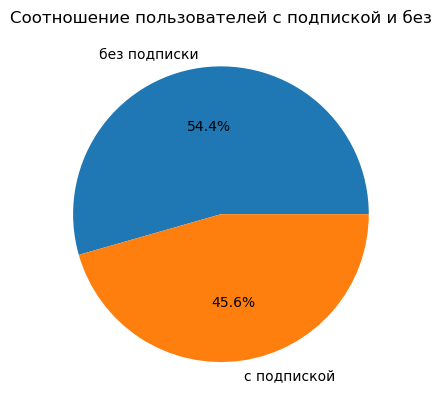

In [17]:
count_users = [835, 699]
labels = ['без подписки', 'c подпиской']
plt.pie(count_users, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без')
plt.show()

Пользователей без подписки (835) больше, чем пользователей с подпиской (699). Доля пользователей без подписки 54,4%, с подпиской 45,6%. 

**Возраст пользователей**

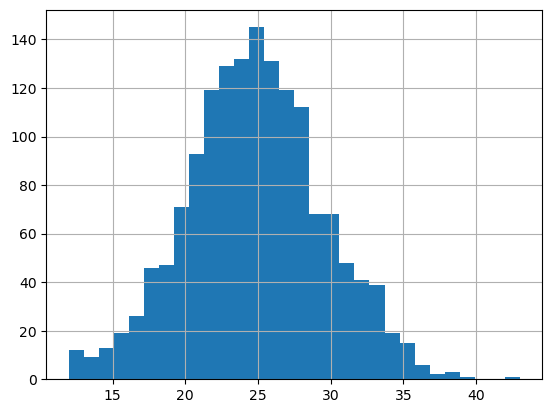

In [18]:
users_df['age'].hist(bins=30);

Большинство пользователей в возрасте от 22 до 28 лет.

In [19]:
# Посмотрим средний возраст пользователей
users_df['age'].mean()

24.903520208604956

In [20]:
# Посмотрим статистические данные столбца age
users_df['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

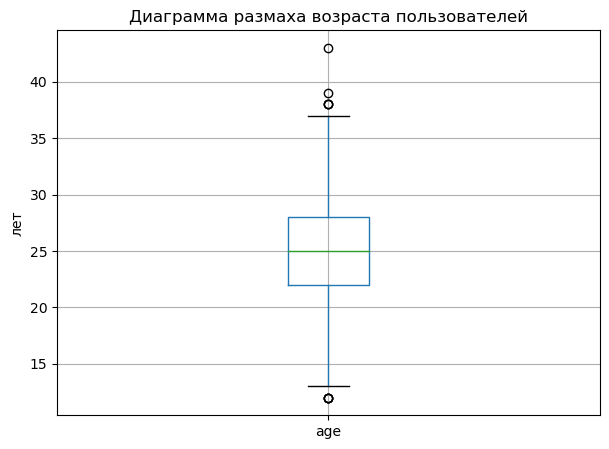

In [21]:
# Построим диаграмму размаха возраста пользователей
users_df.boxplot(column='age', figsize=(7, 5))
plt.title('Диаграмма размаха возраста пользователей')
plt.ylabel('лет')
plt.show()

Как видно из гистограммы, возраст пользователей имеет нормальное распределение. Основная часть пользователей находится в диапозоне от 9 до 36 лет. Минимальный возраст 12 лет, максимальный 43 года. Средний возраст пользователей 25 лет, медиана совпадает. Стандартное отклонение от среднего возраста - 4,5 года. Значения ниже 9 лет и выше 36 - выбросы.

**Расстояние, которое пользователь преодолел за одну поездку**

In [22]:
# Посмотрим среднюю протяженность поездки пользователя с помощью сводной таблицы
mean_distance = rides_df.pivot_table(index='user_id', values='distance', aggfunc='mean')
mean_distance

,distance
user_id,
1,2839.181839
2,3087.641692
3,3075.633155
4,3202.656423
5,3232.449968
...,...
1530,2750.498225
1531,2915.425836
1532,2607.861784


In [23]:
# Посмотрим среднее расстояние
mean_distance['distance'].mean()

3077.296650333368

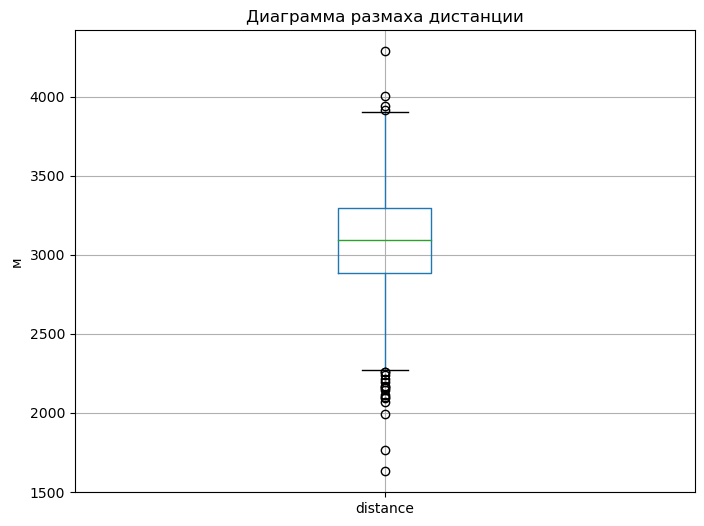

In [24]:
# Построим диаграмму размаха дистанций
mean_distance.boxplot(column='distance', figsize=(8, 6))
plt.title('Диаграмма размаха дистанции')
plt.ylabel('м')
plt.show()

Можно сделать вывод, что обычно пользователи проезажают от 2,3 до 3,9 км. Среднее расстояние 3,077 км, медиана на том же уровне.

**Продолжительность поездок**

In [25]:
# Округлим значения в столбце duration по "потолку"
import numpy as np
rides_df['duration'] = np.ceil(rides_df['duration'])

In [26]:
# Проверим
rides_df.head()

,user_id,distance,duration,date,month
0,1,4409.919140,26.0,2021-01-01,1
1,1,2617.592153,16.0,2021-01-18,1
2,1,754.159807,7.0,2021-04-20,4
3,1,2694.783254,19.0,2021-08-11,8
4,1,4028.687306,27.0,2021-08-28,8


In [27]:
# Посмотрим среднюю продолжительность поездки пользователя с помощью сводной таблицы
mean_duration = rides_df.pivot_table(index='user_id', values='duration', aggfunc='mean')
mean_duration

,duration
user_id,
1,17.583333
2,18.454545
3,19.916667
4,20.928571
5,16.363636
...,...
1530,17.705882
1531,18.217391
1532,16.923077


In [28]:
# Посмотрим среднюю продолжительность поездки
mean_duration['duration'].mean()

18.423613062038985

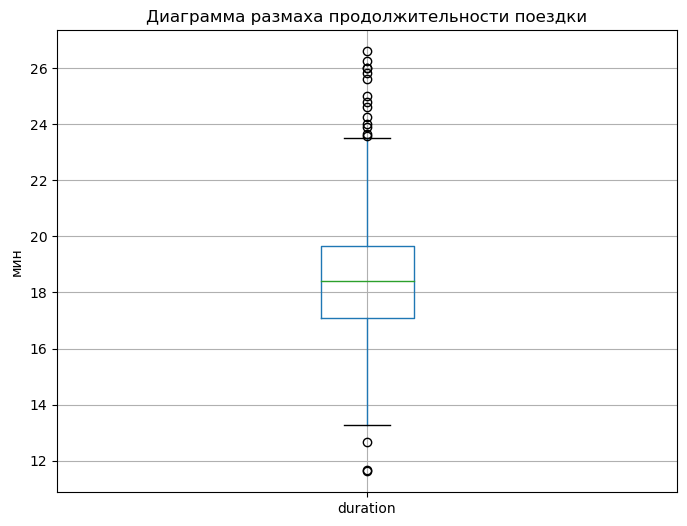

In [29]:
# Построим диаграмму размаха продолжительности поездки
mean_duration.boxplot(column='duration', figsize=(8, 6))
plt.title('Диаграмма размаха продолжительности поездки')
plt.ylabel('мин')
plt.show()

Можно сделать вывод, что обычно пользователи используют самокаты примерно от 13 до 23 минут. Среднее время чуть больше 18 мин, медиана на том же уровне.

**ВЫВОД:** провели ииследовательский анализ данных, добавили новый столбец. Выяснили, что больше всего пользователей в Пятигорске и Екатеринбурге, а меньше всего в Москве. Пользователей с подпиской немного меньше, чем без (700/850). Средний возраст пользователей 25 лет. В среднем пользователи проезжают расстояние около 3 км, среднее время использования самокатов составляет 18 минут.

#### Шаг 4. Объединение данных

In [30]:
# Объединим данные о пользователях, поездках и подписках
df_merge = users_df.merge(rides_df, on='user_id', how='left')
merge_data = df_merge.merge(subscriptions_df, on='subscription_type', how='left')
merge_data.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16.0,2021-11-22,11,6,0,199


In [31]:
# Создадим новый датафрейм с пользователями без подписки
df_free = merge_data.query('subscription_type == "free"')
df_free.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,23.0,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,19.0,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,16.0,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,17.0,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,12.0,2021-06-23,6,8,50,0


In [32]:
df_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [33]:
# Создадим новый датафрейм с пользователями с подпиской
df_ultra = merge_data.query('subscription_type == "ultra"')
df_ultra.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16.0,2021-11-22,11,6,0,199


In [34]:
df_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [35]:
free_distance = df_free['distance']

In [36]:
ultra_distance = df_ultra['distance']

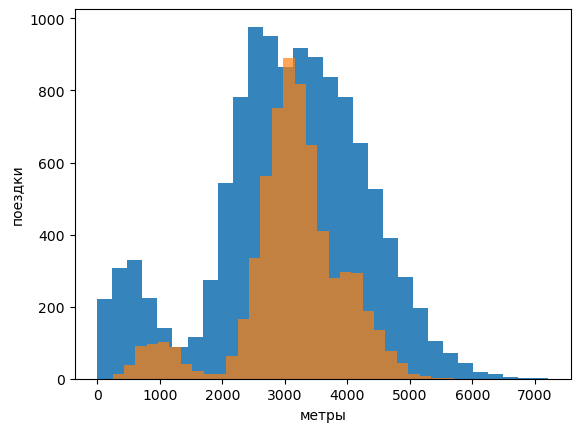

In [37]:
# Сравним графики распределения дистанции для обеих категорий пользователей
plt.hist(free_distance, alpha = 0.9, bins=30)
plt.hist(ultra_distance, alpha = 0.7, bins=30)
plt.xlabel('метры')
plt.ylabel('поездки')
plt.show()

In [38]:
free_distance.describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [39]:
ultra_distance.describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Распределение протяженности поездок обеих групп пользователей близко к нормальному, имеются небольшие всплески в районе малых значений(около 1000 м). В среднем обе категории проезжают практически одинаковое расстояние(около 3,1 км), но пользователи без подписки имеют больший интервал расстояний (их график шире).

In [40]:
free_duration = df_free['duration']
ultra_duration = df_ultra['duration']

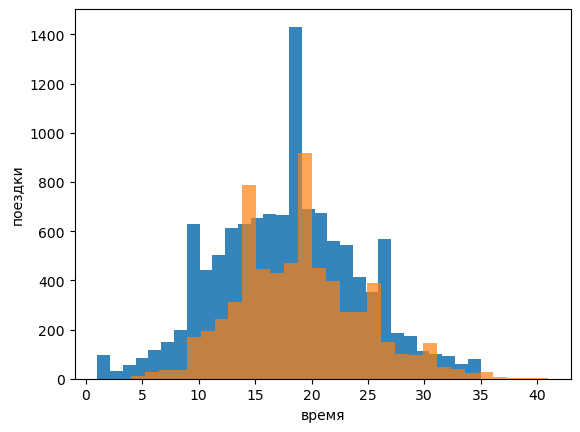

In [41]:
# Сравним графики распределения времени поездок для обеих категорий пользователей
plt.hist(free_duration, alpha = 0.9, bins=30)
plt.hist(ultra_duration, alpha = 0.7, bins=30)
plt.xlabel('время')
plt.ylabel('поездки')
plt.show()

In [42]:
free_duration.describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [43]:
ultra_duration.describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Графики сильно похожи. Распределение времени использования самокатов пользователями обеих групп близко к нормальному. Среднее время почти равное (18 и 19 минут). График времени пользователей с подпиской имеет пик на значении 15 минут, у пользователей без подписки пик - 10 минут. 

**ВЫВОД:** Объединили датафреймы, создали два новых датафрейма для пользователей с подпиской и без. Выяснили, что распределение времени использования самокатов у пользователей обоих групп схожее, минимальное время подписчиков в 4 раза больше минимального времени использования самокатов пользователями без подписки.\
Распределение протяженности поездок пользователей обеих групп также схожее, но различие в том, что стандартное отклонение от среднего расстояния у пользователей с подпиской меньше, их график уже (значения находятся ближе к среднему).

#### Шаг 5. Подсчёт выручки

In [44]:
# С помощью сводной таблицы создадим датафрейм, содержащий данные о суммарном расстоянии, 
# количестве поездок и суммарном времени для каждого пользователя за каждый месяц, а также данные о подписках
df_agregated = merge_data.pivot_table(index=['user_id', 'month', 'minute_price', 'start_ride_price', 'subscription_fee'],
                                      values=['duration', 'distance'],
                                    aggfunc={'duration': 'sum', 'month': 'count', 'distance': 'sum', 'minute_price': 'min',
                                            'start_ride_price': 'min', 'subscription_fee': 'min'})
df_agregated.columns = ['distance_sum', 'duration_sum', 'price_for_minute', 'count', 'start_price', 'subscription_type']

df_agregated.head(25)

distance_sum  \
user_id month minute_price start_ride_price subscription_fee                 
1       1     6            0                199                7027.511294   
        4     6            0                199                 754.159807   
        8     6            0                199                6723.470560   
        10    6            0                199                5809.911100   
        11    6            0                199                7003.499363   
        12    6            0                199                6751.629942   
2       3     6            0                199               10187.723006   
        4     6            0                199                6164.381824   
        6     6            0                199                3255.338202   
        7     6            0                199                6780.722964   
        8     6            0                199                 923.007439   
        10    6            0                199                2824.636598   
        12    6            0                199                3828.248580   
3       1     6            0                199                3061.777147   
        2     6            0                199                5421.152016   
        4     6            0                199                2956.651632   
        5     6            0                199                9064.026918   
        7     6            0                199               10919.595403   
        9     6            0                199                2891.012822   
        12    6            0                199                2593.381928   
4       2     6            0                199                6339.696747   
        6     6            0                199                6753.041806   
        7     6            0                199               10491.175555   
        8     6            0                199                4649.488243   
        10    6            0                199               13260.762274   

                                                              duration_sum  \
user_id month minute_price start_ride_price subscription_fee                 
1       1     6            0                199                       42.0   
        4     6            0                199                        7.0   
        8     6            0                199                       46.0   
        10    6            0                199                       32.0   
        11    6            0                199                       56.0   
        12    6            0                199                       28.0   
2       3     6            0                199                       63.0   
        4     6            0                199                       40.0   
        6     6            0                199                       14.0   
        7     6            0                199                       48.0   
        8     6            0                199                        7.0   
        10    6            0                199                       19.0   
        12    6            0                199                       12.0   
3       1     6            0                199                       13.0   
        2     6            0                199                       39.0   
        4     6            0                199                       21.0   
        5     6            0                199                       63.0   
        7     6            0                199                       67.0   
        9     6            0                199                       23.0   
        12    6            0                199                       13.0   
4       2     6            0                199                       49.0   
        6     6            0                199                       45.0   
        7     6            0                199                       56.0   
     

In [45]:
# Добавим в агрегированную таблицу новый столбец с выручкой по месяцам
df_agregated['revenue'] = (df_agregated['start_price'] * df_agregated['count']) + (df_agregated['price_for_minute'] * df_agregated['duration_sum']) + df_agregated['subscription_type']
df_agregated.head(20)

distance_sum  \
user_id month minute_price start_ride_price subscription_fee                 
1       1     6            0                199                7027.511294   
        4     6            0                199                 754.159807   
        8     6            0                199                6723.470560   
        10    6            0                199                5809.911100   
        11    6            0                199                7003.499363   
        12    6            0                199                6751.629942   
2       3     6            0                199               10187.723006   
        4     6            0                199                6164.381824   
        6     6            0                199                3255.338202   
        7     6            0                199                6780.722964   
        8     6            0                199                 923.007439   
        10    6            0                199                2824.636598   
        12    6            0                199                3828.248580   
3       1     6            0                199                3061.777147   
        2     6            0                199                5421.152016   
        4     6            0                199                2956.651632   
        5     6            0                199                9064.026918   
        7     6            0                199               10919.595403   
        9     6            0                199                2891.012822   
        12    6            0                199                2593.381928   

                                                              duration_sum  \
user_id month minute_price start_ride_price subscription_fee                 
1       1     6            0                199                       42.0   
        4     6            0                199                        7.0   
        8     6            0                199                       46.0   
        10    6            0                199                       32.0   
        11    6            0                199                       56.0   
        12    6            0                199                       28.0   
2       3     6            0                199                       63.0   
        4     6            0                199                       40.0   
        6     6            0                199                       14.0   
        7     6            0                199                       48.0   
        8     6            0                199                        7.0   
        10    6            0                199                       19.0   
        12    6            0                199                       12.0   
3       1     6            0                199                       13.0   
        2     6            0                199                       39.0   
        4     6            0                199                       21.0   
        5     6            0                199                       63.0   
        7     6            0                199                       67.0   
        9     6            0                199                       23.0   
        12    6            0                199                       13.0   

                                                              price_for_minute  \
user_id month minute_price start_ride_price subscription_fee                     
1       1     6            0                199                              6   
        4     6            0                199                              6   
        8     6            0                199                              6   
        10    6            0                199                              6   
        11    6            0                199                              6   
        12    6            0                199       

In [46]:
# Код ревьюера
df_agregated.groupby('subscription_type')['revenue'].mean()

subscription_type
0      328.641365
199    362.792191
Name: revenue, dtype: float64

**ВЫВОД**: создали агрегированную таблицу и посчитали месячную выручку по каждому пользователю.

#### Шаг 6. Проверка гипотез

**6.1. Проверим гипотезу о том, что пользователи с подпиской тратят больше времени на поездки.**

Нулевая гипотеза - среднее время использования самокатов пользователями из двух групп равно.\
Альтернативная - среднее время использования самокатов пользователями без подписки меньше, чем среднее время использования самокатов пользователями с подпиской.

Вывод: можно сказать, что среднее время использования самокатов пользователями из двух групп равно.

In [47]:
# Код ревьюера
duration_ultra = df_merge.query('subscription_type == "ultra"')['duration'] # Время пользователей с подпиской

duration_free = df_merge.query('subscription_type == "free"')['duration'] # Время пользователей без подписки

alpha = 0.05 # Уровень статистической значимости

results_duration = st.ttest_ind(duration_ultra, duration_free, equal_var=False, alternative='greater') # Т.к. выборки разные по размерам используем параметр equal_var=False

print(f'p-value: {results_duration.pvalue}')

# проверяем p-value
if results_duration.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


**6.2. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.**

Нулевая гипотеза - расстояние, которое проезжают бользователи с подпиской не превышает 3130 метров.\
Альтернативная -  расстояние, которое проезжают бользователи с подпиской превышает 3130 метров.

In [48]:
mean_distance_ultra = 3130 
alpha = 0.05
# Проверим гипотезу с помощью ttest по датафрейму с данными пользователей с подпиской
results_distance = st.ttest_1samp(df_ultra['distance'], mean_distance_ultra, alternative='greater') 

print('p-значение:', results_distance.pvalue)

if results_distance.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Гипотеза верна')

p-значение: 0.9195368847849785
Гипотеза верна


Вывод: значение расстояния 3130 метров, которое оптимальное со стороны износа самоката не значительно отличается от среднего расстояния, которое проезжают пользователи с подпиской. Тест это подтвердил, гипотеза верна.  

**6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.** 

Нулевая гипотеза - средние значения выручки от пользователей из двух групп равны.\
Альтернативная - среднее значение выручки от пользователей с подпиской больше, чем среднее значение выручки от пользователей без подписки.

In [49]:
revenue_ultra = df_agregated.query('subscription_type > 0')['revenue'] # Выручка от пользователей с подпиской

revenue_free = df_agregated.query('subscription_type == 0')['revenue'] # Выручка от пользователей без подписки

alpha = 0.05 # Уровень статистической значимости

results_revenue = st.ttest_ind(revenue_ultra, revenue_free, equal_var=False, alternative='greater') # Т.к. выборки разные по размерам используем параметр equal_var=False

print(f'p-value: {results_revenue.pvalue}')

# проверяем p-value
if results_revenue.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Вывод: полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Можно сказать, что выручка от пользователи с подпиской больше.

**6.4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы**

В данной задаче количество обращений в техподдержку можно рассматривать как генеральную совокупность, с которой произошли некоторые изменения (обновление серверов). Поэтому здесь нельзя испольпользовать t-тест для проверки гипотезы, так как не выполняется условие о том, что генеральные совокупности НЕ должны зависить друг от друга. Для проверки гипотезы о равенстве средних двух генеральных совокупностей для зависимых (парных) выборок необходимо использовать метод scipy.stats.ttest_rel() и передать ему два параметра: набор данных до обновления серверов и после.

**ОБЩИЙ ВЫВОД:**\
Проведено исследование сервиса аренды самокатов. В ходе исследования выявлены города с наибольшим число пользователей (Пятигорск и Екатеринбург) и наименьшим числом пользователей (Москва). Средний возраст пользователей 25 лет, пользователей с подпиской меньше, чем пользователей без подписки (примерно 699/835).\
Произведен расчет помесячной выручки.\
В ходе исследования были проверены несколько гипотез. По результатам проверки гипотез можно сказать, что продолжительность поездок пользователей с подпиской и без одинаковая, а вот выручка сервиса, благодаря пользователям с подпиской выше. Значит необходимо увеличить количество пользователей с подпиской, для этого можно использовать различные акции.\
Также проверили гипотезу о том, что пользователи с подпиской проезжают не более 3130 метров за одну поездку (это оптимальное расстояние с точки зрения износа самоката). Гипотеза подтвердилась.\
Пользователи с подпиской являются более выгодными для компании.